![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Week 3 and 4

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-10-29)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_3_4_EXERCISES.ipynb)


# PANDAS

## Groupby exersises

Import this [dataset](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user)

   1. What is the mean age per occupation?
   2. What is the male ratio per occupation, sort it from the most to the least. Do the same for women
   3. For each occupation, calculate the minimum and maximum ages
   4. For each combination of occupation and gender, calculate the mean age
   5. For each occupation present the percentage of women and men



In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
job = pd.read_csv(url, sep='|', index_col = 'user_id')
job

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [ ]:
#1: What is the mean age per occupation?
job["occupation"] = job["occupation"].astype("category")
job.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [ ]:
#2: What is the male ratio per occupation, sort it from the most to the least. Do the same for women
g_count =job.groupby(['occupation','gender'])['gender'].count()
g_total =job.groupby(['occupation'])['gender'].count()
r=((g_count/g_total)*100).round(2)
print(r)

occupation     gender
administrator  F          45.57
               M          54.43
artist         F          46.43
               M          53.57
doctor         F           0.00
               M         100.00
educator       F          27.37
               M          72.63
engineer       F           2.99
               M          97.01
entertainment  F          11.11
               M          88.89
executive      F           9.38
               M          90.62
healthcare     F          68.75
               M          31.25
homemaker      F          85.71
               M          14.29
lawyer         F          16.67
               M          83.33
librarian      F          56.86
               M          43.14
marketing      F          38.46
               M          61.54
none           F          44.44
               M          55.56
other          F          34.29
               M          65.71
programmer     F           9.09
               M          90.91
retired        F  

In [ ]:
###Proper solution Male
"""
We create a function to apply it and create a new column. We will call it gender number.
This function returns values of 1 to count the gender that we are interested in
"""
# create a function
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

# apply the function to the gender column and create a new column
job['gender_n'] = job['gender'].apply(gender_to_numeric)
job.head(10)

# 

a = job.groupby('occupation').gender_n.sum() / job.occupation.value_counts() * 100 

# sort to the most male 
a.sort_values(ascending = False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

In [ ]:
###Proper solution Female
"""
We create a function to apply it and create a new column. We will call it gender number.
This function returns values of 1 to count the gender that we are interested in
"""
def gender_to_numeric(x):
    if x == 'M':
        return 0
    if x == 'F':
        return 1

# apply the function to the gender column and create a new column
job['gender_n'] = job['gender'].apply(gender_to_numeric)
job.head(10)

#

a = job.groupby('occupation').gender_n.sum() / job.occupation.value_counts() * 100 

# sort to the most female 
a.sort_values(ascending = False)

homemaker        85.714286
healthcare       68.750000
librarian        56.862745
artist           46.428571
administrator    45.569620
none             44.444444
writer           42.222222
marketing        38.461538
other            34.285714
student          30.612245
educator         27.368421
salesman         25.000000
lawyer           16.666667
entertainment    11.111111
scientist         9.677419
executive         9.375000
programmer        9.090909
retired           7.142857
technician        3.703704
engineer          2.985075
doctor            0.000000
dtype: float64

In [ ]:
#3: For each occupation, calculate the minimum and maximum ages
job.groupby('occupation')['age'].agg([pd.np.min, pd.np.max])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


,amin,amax
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [ ]:
#4: For each combination of occupation and gender, calculate the mean age
job.groupby(['occupation','gender'])['age'].agg([pd.np.mean]).round(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


mean
occupation    gender       
administrator F       40.64
              M       37.16
artist        F       30.31
              M       32.33
doctor        F         NaN
              M       43.57
educator      F       39.12
              M       43.10
engineer      F       29.50
              M       36.60
entertainment F       31.00
              M       29.00
executive     F       44.00
              M       38.17
healthcare    F       39.82
              M       45.40
homemaker     F       34.17
              M       23.00
lawyer        F       39.50
              M       36.20
librarian     F       40.00
              M       40.00
marketing     F       37.20
              M       37.88
none          F       36.50
              M       18.60
other         F       35.47
              M       34.03
programmer    F       32.17
              M       33.22
retired       F       70.00
              M       62.54
salesman      F       27.00
              M       38.56
scientist     F       28.33
              M       36.32
student       F       20.75
              M       22.67
technician    F       38.00
              M       32.96
writer        F       37.63
              M       35.35

In [ ]:
#5: For each occupation present the percentage of women and men
g_count =job.groupby(['occupation','gender'])['gender'].count()
g_total =job.groupby(['occupation'])['gender'].count()
r=((g_count/g_total)*100).round(2)
print(r)

occupation     gender
administrator  F          45.57
               M          54.43
artist         F          46.43
               M          53.57
doctor         F           0.00
               M         100.00
educator       F          27.37
               M          72.63
engineer       F           2.99
               M          97.01
entertainment  F          11.11
               M          88.89
executive      F           9.38
               M          90.62
healthcare     F          68.75
               M          31.25
homemaker      F          85.71
               M          14.29
lawyer         F          16.67
               M          83.33
librarian      F          56.86
               M          43.14
marketing      F          38.46
               M          61.54
none           F          44.44
               M          55.56
other          F          34.29
               M          65.71
programmer     F           9.09
               M          90.91
retired        F  

## Apply exercises

Import this [dataset](https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv)

 1. What is the type of the columns?
 2. Convert the type of the column Year to datetime64
 3. Set the Year column as the index of the dataframe
 4. Delete the Total column
 5. Group the year by decades and sum the values (take care with population values) 
 6. What is the most dangerous decade to live in the US?


In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv'
crime= pd.read_csv(url, sep=',')
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [ ]:
#1: What is the type of the columns?
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                55 non-null     int64
 1   Population          55 non-null     int64
 2   Total               55 non-null     int64
 3   Violent             55 non-null     int64
 4   Property            55 non-null     int64
 5   Murder              55 non-null     int64
 6   Forcible_Rape       55 non-null     int64
 7   Robbery             55 non-null     int64
 8   Aggravated_assault  55 non-null     int64
 9   Burglary            55 non-null     int64
 10  Larceny_Theft       55 non-null     int64
 11  Vehicle_Theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB


In [ ]:
#2: Convert the type of the column Year to datetime64
crime['Year'] = pd.to_datetime(crime["Year"],format='%Y') 
crime.dtypes

Year                  datetime64[ns]
Population                     int64
Total                          int64
Violent                        int64
Property                       int64
Murder                         int64
Forcible_Rape                  int64
Robbery                        int64
Aggravated_assault             int64
Burglary                       int64
Larceny_Theft                  int64
Vehicle_Theft                  int64
dtype: object

In [ ]:
#2: Victor's Solution
crime= pd.read_csv(url, sep=',',parse_dates=['Year'])

In [ ]:
#3: Set the Year column as the index of the dataframe
crime.set_index('Year', inplace=True)

In [ ]:
#4: Delete the Total column
crime= crime.drop(['Total'],axis=1)
crime.tail(1)

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
2014-01-01,318857056,1197987,8277829,14249,84041,325802,741291,1729806,5858496,689527


In [ ]:
#5: Group the year by decades and sum the values (take care with population values)
crimes = crime.resample('10AS').sum()
crimes.head(10)

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,1915053175,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,2121193298,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,2371370069,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,2612825258,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,2947969117,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,1570146307,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [ ]:
#5: What is the most dangerous decade to live in the US?
crimes['Percentage of population subject to crime'] = (crimes['Violent'] + crimes['Property'] + crimes['Murder'] + crimes['Forcible_Rape'] + crimes['Robbery'] + crimes['Aggravated_assault'] + crimes['Burglary'] + crimes['Larceny_Theft'] + crimes['Vehicle_Theft'])/ crimes['Population']
crimes5 = crimes[['Percentage of population subject to crime']].copy()
print(crimes5)

            Percentage of population subject to crime
Year                                                 
1960-01-01                                   0.051482
1970-01-01                                   0.095222
1980-01-01                                   0.110589
1990-01-01                                   0.104547
2000-01-01                                   0.077962
2010-01-01                                   0.063861


From the table above we see that the 1980's is the most dangerous decade

# SQLite and Pandas

## SQLite, Pandas and the world of tips

Given [this](https://github.com/vfp1/bts-dsf-2020/blob/main/data/tips.csv) CSV file. Do the following:

* Load it in Pandas
* Save the `DataFrame` as SQLite
* Reply the following questions by slicing the SQLite database with SQL queries and then using Pandas for analysis:
    * Who is most likely to receive a tip during weekday? A Female or a Male? 
        * And during weekends?
    * What is the table size that is most likely to bring a better tip?
    * Who are giving more tips, smokers or non smokers? 

In [ ]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/tips.csv'
tips = pd.read_csv(url)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#Save as SQLite
import sqlite3

cnx = sqlite3.connect('tips.db')
tips.to_sql(name='tips', con=cnx)

In [ ]:
import sqlite3

def create_connect_database(db_name):
    """Opens connection or creates it if it is not existent"""
    connection = sqlite3.connect(db_name)
    cursor = connection.cursor()
    
    return connection, cursor

def commit_close(conn, c, close_connection=True):
    """Commits to connection DB and closes it if close is True"""
    conn.commit()

    if close_connection is True:
        c.close()
        conn.close()
    elif close_connection is False:
        pass

In [ ]:
#1: Who is most likely to receive a tip during weekday? A Female or a Male?
import pandas as pd
import sqlite3

conn, cursor = create_connect_database("tips.db")

query = """SELECT day, sex, COUNT(*)
FROM tips
GROUP BY day, sex;"""

df = pd.read_sql_query(query, conn)
df.head(14)

,day,sex,COUNT(*)
0,Fri,Female,9
1,Fri,Male,10
2,Sat,Female,28
3,Sat,Male,59
4,Sun,Female,18
5,Sun,Male,58
6,Thur,Female,32
7,Thur,Male,30


In [ ]:
query = '''SELECT  

                sex 

                ,CASE 

                    WHEN (day != 'Sat') and (day != 'Sun') THEN 'weekday' 

                    ELSE 'weekend' 

                END AS weekday_weekend 

                ,count(tip) 

  

FROM tips 

GROUP BY sex 

                ,CASE 

                    WHEN (day != 'Sat') and (day != 'Sun') THEN 'weekday' 

                    ELSE 'weekend' 

                END 

''' 
df = pd.read_sql_query(query, conn)
df

,sex,weekday_weekend,count(tip)
0,Female,weekday,41
1,Female,weekend,46
2,Male,weekday,40
3,Male,weekend,117


In [ ]:
import pandas as pd
import sqlite3

conn, cursor = create_connect_database("tips.db")

query = """SELECT size, AVG(tip), COUNT(*)
FROM tips
GROUP BY size;"""

df = pd.read_sql_query(query, conn)
df

## More airports

For extra points, plot the routs of incoming/outgoing destinations using Geopandas
 

Download [this Sqlite database](https://github.com/vfp1/bts-dsf-2020/raw/main/data/flights.db)

Using SQLite database reply the following questions:

  1. Which is the country that has the least amount of active airlines?
  2. And which is the country that has the most amount of active airlines?
  3. Which is the country that has more airports?
  4. And the country with the least airports?
  5. Which country has the most outgoing destinations? And the least?
  6. And which country has the most incoming destinations? And the least?



In [ ]:
import sqlite3

def create_connect_database(db_name):
    """Opens connection or creates it if it is not existent"""
    connection = sqlite3.connect(db_name)
    cursor = connection.cursor()
    
    return connection, cursor

def commit_close(conn, c, close_connection=True):
    """Commits to connection DB and closes it if close is True"""
    conn.commit()

    if close_connection is True:
        c.close()
        conn.close()
    elif close_connection is False:
        pass

In [ ]:
!wget "https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/flights.db"

--2020-11-10 01:35:37--  https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/flights.db
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/flights.db [following]
--2020-11-10 01:35:38--  https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/flights.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5415936 (5.2M) [application/octet-stream]
Saving to: ‘flights.db’

flights.db          100%[===================>]   5.17M  18.8MB/s    in 0.3s    

2020-11-10 01:35

In [ ]:
import sqlite3

connection, cursor = create_connect_database('flights.db')

cursor.execute("SELECT name FROM SQLite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('airports',), ('airlines',), ('routes',)]


In [ ]:
#1: Which is the country that has the least amount of active airlines?
import pandas as pd
import sqlite3

conn, cursor = create_connect_database("flights.db")

query = """SELECT country FROM airlines WHERE active=='Y';"""

flights = pd.read_sql_query(query, conn)
ans1 = flights['country'].value_counts().sort_values(ascending=True)
ans1.head(60)

Equatorial Guinea                        1
Republic of the Congo                    1
Suriname                                 1
Ethiopia                                 1
Aruba                                    1
American Samoa                           1
Benin                                    1
Lao Peoples Democratic Republic          1
Solomon Islands                          1
Burundi                                  1
Gabon                                    1
Cayman Islands                           1
Seychelles                               1
Reunion                                  1
Faroe Islands                            1
 S.A.                                    1
Cook Islands                             1
Puerto Rico                              1
Madagascar                               1
Trinidad and Tobago                      1
Honduras                                 1
Bhutan                                   1
Jamaica                                  1
Guadeloupe 

The 60 countries displayed above all have the least active airlines with only one each.

In [ ]:
#2: And which is the country that has the most amount of active airlines?
ans2 = flights['country'].value_counts().sort_values(ascending=False)
ans2.head(3)

United States     141
Russia             72
United Kingdom     40
Name: country, dtype: int64

The United States has the most active airlines, with 141.

In [ ]:
#3: Which is the country that has more airports?
import pandas as pd
import sqlite3

conn, cursor = create_connect_database("flights.db")

query = """SELECT country FROM airports;"""

flights3 = pd.read_sql_query(query, conn)
ans3 = flights3['country'].value_counts().sort_values(ascending=False)
ans3.head(3)

United States    1697
Canada            435
Germany           321
Name: country, dtype: int64

The United States has the most airports, with 1697.

In [ ]:
#4: And the country with the least airports?
ans4 = flights3['country'].value_counts().sort_values(ascending=True)
ans4.head(30)

West Bank                         1
Mayotte                           1
Gibraltar                         1
Burundi                           1
British Indian Ocean Territory    1
Gambia                            1
Monaco                            1
Midway Islands                    1
Isle of Man                       1
Christmas Island                  1
Palestine                         1
Benin                             1
Wake Island                       1
Jersey                            1
Niue                              1
Saint Helena                      1
Tuvalu                            1
Korea                             1
Barbados                          1
Nauru                             1
Norfolk Island                    1
Aruba                             1
Bhutan                            1
Cocos (Keeling) Islands           1
Myanmar                           1
Swaziland                         1
Luxembourg                        1
Albania                     

The 30 countries above all have the least airports with only 1 each.

In [ ]:
#5: Which country has the most outgoing destinations? And the least?
import pandas as pd
import sqlite3

conn, cursor = create_connect_database("flights.db")

query = """SELECT 
CAST(source_air.country AS TEXT) AS source_country, 
CAST(destination_air.country AS TEXT) AS destination_country 
FROM routes 
INNER JOIN airports source_air 
  ON source_air.id = routes.source_id 
INNER JOIN airports destination_air 
  ON destination_air.id = routes.dest_id;"""

flights5 = pd.read_sql_query(query, conn)

In [ ]:
ans5 = flights5['source_country'].value_counts().sort_values(ascending=False)
ans5.head(3)

United States     13178
China              8146
United Kingdom     2661
Name: source_country, dtype: int64

In [ ]:
ans5.tail(8)

Swaziland                  1
Lesotho                    1
Cocos (Keeling) Islands    1
American Samoa             1
Tuvalu                     1
Monaco                     1
Falkland Islands           1
Niue                       1
Name: source_country, dtype: int64

The United states has the most outgoing destinations with 13178. While the 8 countries above have the least, all with only one.


In [ ]:
#6: Which country has the most incoming destinations? And the least?
ans6 = flights5['destination_country'].value_counts().sort_values(ascending=False)
ans6.head(3)

United States     13173
China              8146
United Kingdom     2635
Name: destination_country, dtype: int64

In [ ]:
ans6.tail(7)

Cocos (Keeling) Islands    1
Tuvalu                     1
Monaco                     1
Lesotho                    1
American Samoa             1
Falkland Islands           1
Swaziland                  1
Name: destination_country, dtype: int64

The United states has the most incoming destinations with 13173. While the 7 countries above have the least, all with only one.

# Kaggle Titanic

Your first Kaggle challenge! 

Retrieve the csv (train) file from [this Kaggle challenge](https://www.kaggle.com/c/titanic/data?select=train.csv)

Either here or through a Kaggle notebook (you will need to submit then this notebook with the rest of exercises and the Kaggle notebook).

Reply to the following questions:



1.   How many men and women survived?
2.   What was the age group that had a higher survival chance? You can divide age groups in groups of 10 years
3. Which port of embarkation had most of the survivors? And which less?
4. Which ticket class had most of the survivors? And which less?
5. Could you compare the ticket fare with the survival? Did more expensive tickets had higher chance of surviving?



In [ ]:
import pandas as pd
path = '/content/train.csv'
ti = pd.read_csv(path)
ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#1: How many men and women survived?

ti["Sex"] = ti["Sex"].astype("category")

#create df with only survived and sex
ti1 = ti[['Survived','Sex']].copy()

#Drop dead from df 
ti1 = ti1[~(ti1 == 0).any(axis=1)]

#Answer
ans1 =ti1.groupby(['Sex'])['Survived'].count()
print(ans1)

Sex
female    233
male      109
Name: Survived, dtype: int64


In [ ]:
#2: What was the age group that had a higher survival chance? You can divide age groups in groups of 10 years

#create df with only survived and sex
ti2 = ti[['Survived','Age']].copy()
ti2.dropna()

#create bins
bins= [0,10,20,30,40,50,60,70,1000]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70+']

#Create new column and use cut to assign names to bins 
ti2['AgeGroup'] = pd.cut(ti2['Age'], bins=bins, labels=labels, right=False)

#Percentage of each age group that survived and died
ti_count =ti2.groupby(['AgeGroup','Survived'])['Survived'].count()
ti_total =ti2.groupby(['AgeGroup'])['Survived'].count()
ans2=((ti_count/ti_total)*100).round(2)

#Answer 2
print(ans2)

AgeGroup  Survived
0-9       0           38.71
          1           61.29
10-19     0           59.80
          1           40.20
20-29     0           65.00
          1           35.00
30-39     0           56.29
          1           43.71
40-49     0           61.80
          1           38.20
50-59     0           58.33
          1           41.67
60-69     0           68.42
          1           31.58
70+       0           85.71
          1           14.29
Name: Survived, dtype: float64


0 to 9 year olds (infants/children) were the most likely to survive 

In [ ]:
#3: Which port of embarkation had most of the survivors? And which less?
ti3 = ti[['Survived','Embarked']].copy()

ans3 = ti3.groupby('Embarked').Survived.sum()  

ans3.sort_values(ascending = False)

Embarked
S    217
C     93
Q     30
Name: Survived, dtype: int64

Port S had the most and port Q had the least 

In [ ]:
#4: Which ticket class had most of the survivors? And which less?
ti4 = ti[['Survived','Pclass']].copy()

ans4 = ti4.groupby('Pclass').Survived.sum()  

ans4.sort_values(ascending = False)

Pclass
1    136
3    119
2     87
Name: Survived, dtype: int64

Ticket class 1 had the most while ticket class 2 had the least 

512.3292
PriceGroup
0-24.99       28.73
25-49.99      42.20
50-74.99      54.69
75-99.99      79.55
100-149.99    79.17
150-249.99    65.00
250+          77.78
dtype: float64


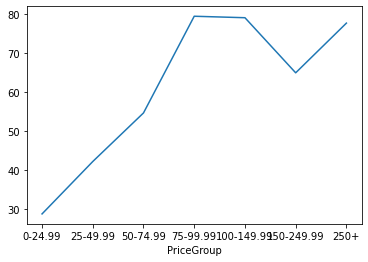

In [ ]:
#5: Could you compare the ticket fare with the survival? Did more expensive tickets had higher chance of surviving?
ti5 = ti[['Survived','Fare']].copy()
maxfare = ti5['Fare'].agg(max)
print(maxfare)

#create bins n labels
bins= [0,25,50,75,100,150,250,600]
labels = ['0-24.99','25-49.99','50-74.99','75-99.99','100-149.99','150-249.99','250+']

#Create new column and use cut to assign names and values to bins 
ti5['PriceGroup'] = pd.cut(ti5['Fare'], bins=bins, labels=labels, right=False)

ans5 = ti5.groupby('PriceGroup').Survived.sum() / ti5.PriceGroup.value_counts() * 100 

#Answer 5
print(ans5.round(2))
ans5.plot()

As we can see from the following table and graph, if you're from the lower price brackets you were less likely to survive.